In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

from keras.models import Sequential
from keras.layers import InputLayer, LSTM, Dense, Dropout, Conv1D, MaxPooling1D, BatchNormalization
from keras.optimizers import Adam
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError
from keras.constraints import MaxNorm
from keras.callbacks import ModelCheckpoint

import time

In [2]:
filepath = 'C:/Users/ss230/Documents/Study/NSIDC/Edited Data/S_Sea_Ice_Index_Regional_Monthly_Data_G02135_v3.0.xlsx'
Indian_Extent = pd.read_excel(filepath, sheet_name='Indian-Extent-km^2')

In [3]:
import sys
sys.path.append('C:/Users/ss230/Documents/Study/NSIDC/SH/Bi_LSTM_Extent/')
import Function as fp

In [4]:
fp.month_mapping(Indian_Extent)
fp.date_time(Indian_Extent)

,Extent,Date
0,376618.799,1979-01-01
1,211788.726,1979-02-01
2,262868.141,1979-03-01
3,698377.304,1979-04-01
4,1252407.727,1979-05-01
...,...,...
533,1520776.003,2023-06-01
534,2076164.165,2023-07-01
535,2731799.027,2023-08-01
536,3179384.692,2023-09-01


In [5]:
scaler = MinMaxScaler()
Indian_Extent['Extent'] = scaler.fit_transform(Indian_Extent['Extent'].values.reshape(-1, 1))

In [6]:
extent = Indian_Extent['Extent']
W_S=12
X,y = fp.df_to_X_y(extent, W_S)
X.shape, y.shape

((526, 12, 1), (526,))

In [7]:
X_train, y_train = X[:420], y[:420]
X_val, y_val = X[420:472], y[420:472]
X_test, y_test = X[472:], y[472:]

In [8]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(W_S, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(32, kernel_constraint=MaxNorm(1.0), activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1, activation='linear'))

In [9]:
cp = ModelCheckpoint('Indian_model/', save_best_only=True)
model.compile(loss=MeanSquaredError(), optimizer=Adam(0.0001), metrics=[RootMeanSquaredError()])

In [10]:
stime = time.time()
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=8, callbacks=[cp])
etime = time.time()

Epoch 1/50
45/53 [========================>.....] - ETA: 0s - loss: 0.2191 - root_mean_squared_error: 0.4681

INFO:tensorflow:Assets written to: Indian_model\assets


INFO:tensorflow:Assets written to: Indian_model\assets


53/53 [==============================] - 8s 100ms/step - loss: 0.2170 - root_mean_squared_error: 0.4659 - val_loss: 0.2080 - val_root_mean_squared_error: 0.4560
Epoch 2/50
48/53 [==========================>...] - ETA: 0s - loss: 0.1601 - root_mean_squared_error: 0.4001

INFO:tensorflow:Assets written to: Indian_model\assets


INFO:tensorflow:Assets written to: Indian_model\assets


53/53 [==============================] - 5s 91ms/step - loss: 0.1625 - root_mean_squared_error: 0.4031 - val_loss: 0.1712 - val_root_mean_squared_error: 0.4138
Epoch 3/50
46/53 [=========================>....] - ETA: 0s - loss: 0.1270 - root_mean_squared_error: 0.3563

INFO:tensorflow:Assets written to: Indian_model\assets


INFO:tensorflow:Assets written to: Indian_model\assets


53/53 [==============================] - 4s 85ms/step - loss: 0.1279 - root_mean_squared_error: 0.3577 - val_loss: 0.1406 - val_root_mean_squared_error: 0.3750
Epoch 4/50
46/53 [=========================>....] - ETA: 0s - loss: 0.1008 - root_mean_squared_error: 0.3174

INFO:tensorflow:Assets written to: Indian_model\assets


INFO:tensorflow:Assets written to: Indian_model\assets


53/53 [==============================] - 5s 90ms/step - loss: 0.1055 - root_mean_squared_error: 0.3249 - val_loss: 0.1140 - val_root_mean_squared_error: 0.3376
Epoch 5/50
53/53 [==============================] - ETA: 0s - loss: 0.0771 - root_mean_squared_error: 0.2776

INFO:tensorflow:Assets written to: Indian_model\assets


INFO:tensorflow:Assets written to: Indian_model\assets


53/53 [==============================] - 4s 86ms/step - loss: 0.0771 - root_mean_squared_error: 0.2776 - val_loss: 0.0918 - val_root_mean_squared_error: 0.3030
Epoch 6/50
45/53 [========================>.....] - ETA: 0s - loss: 0.0585 - root_mean_squared_error: 0.2419

INFO:tensorflow:Assets written to: Indian_model\assets


INFO:tensorflow:Assets written to: Indian_model\assets


53/53 [==============================] - 4s 85ms/step - loss: 0.0600 - root_mean_squared_error: 0.2449 - val_loss: 0.0748 - val_root_mean_squared_error: 0.2735
Epoch 7/50
50/53 [===========================>..] - ETA: 0s - loss: 0.0483 - root_mean_squared_error: 0.2198

INFO:tensorflow:Assets written to: Indian_model\assets


INFO:tensorflow:Assets written to: Indian_model\assets


53/53 [==============================] - 5s 94ms/step - loss: 0.0471 - root_mean_squared_error: 0.2169 - val_loss: 0.0599 - val_root_mean_squared_error: 0.2447
Epoch 8/50
45/53 [========================>.....] - ETA: 0s - loss: 0.0396 - root_mean_squared_error: 0.1990

INFO:tensorflow:Assets written to: Indian_model\assets


INFO:tensorflow:Assets written to: Indian_model\assets


53/53 [==============================] - 4s 86ms/step - loss: 0.0367 - root_mean_squared_error: 0.1916 - val_loss: 0.0486 - val_root_mean_squared_error: 0.2205
Epoch 9/50
47/53 [=========================>....] - ETA: 0s - loss: 0.0316 - root_mean_squared_error: 0.1777

INFO:tensorflow:Assets written to: Indian_model\assets


INFO:tensorflow:Assets written to: Indian_model\assets


53/53 [==============================] - 4s 80ms/step - loss: 0.0325 - root_mean_squared_error: 0.1803 - val_loss: 0.0382 - val_root_mean_squared_error: 0.1953
Epoch 10/50
48/53 [==========================>...] - ETA: 0s - loss: 0.0239 - root_mean_squared_error: 0.1548

INFO:tensorflow:Assets written to: Indian_model\assets


INFO:tensorflow:Assets written to: Indian_model\assets


53/53 [==============================] - 5s 90ms/step - loss: 0.0231 - root_mean_squared_error: 0.1520 - val_loss: 0.0305 - val_root_mean_squared_error: 0.1747
Epoch 11/50
49/53 [==========================>...] - ETA: 0s - loss: 0.0270 - root_mean_squared_error: 0.1644

INFO:tensorflow:Assets written to: Indian_model\assets


INFO:tensorflow:Assets written to: Indian_model\assets


53/53 [==============================] - 4s 86ms/step - loss: 0.0260 - root_mean_squared_error: 0.1612 - val_loss: 0.0220 - val_root_mean_squared_error: 0.1483
Epoch 12/50
46/53 [=========================>....] - ETA: 0s - loss: 0.0177 - root_mean_squared_error: 0.1329

INFO:tensorflow:Assets written to: Indian_model\assets


INFO:tensorflow:Assets written to: Indian_model\assets


53/53 [==============================] - 5s 92ms/step - loss: 0.0165 - root_mean_squared_error: 0.1283 - val_loss: 0.0138 - val_root_mean_squared_error: 0.1173
Epoch 13/50
46/53 [=========================>....] - ETA: 0s - loss: 0.0177 - root_mean_squared_error: 0.1332

INFO:tensorflow:Assets written to: Indian_model\assets


INFO:tensorflow:Assets written to: Indian_model\assets


53/53 [==============================] - 5s 104ms/step - loss: 0.0161 - root_mean_squared_error: 0.1270 - val_loss: 0.0096 - val_root_mean_squared_error: 0.0979
Epoch 14/50
45/53 [========================>.....] - ETA: 0s - loss: 0.0191 - root_mean_squared_error: 0.1381

INFO:tensorflow:Assets written to: Indian_model\assets


INFO:tensorflow:Assets written to: Indian_model\assets


53/53 [==============================] - 5s 98ms/step - loss: 0.0189 - root_mean_squared_error: 0.1377 - val_loss: 0.0095 - val_root_mean_squared_error: 0.0973
Epoch 15/50
46/53 [=========================>....] - ETA: 0s - loss: 0.0151 - root_mean_squared_error: 0.1230

INFO:tensorflow:Assets written to: Indian_model\assets


INFO:tensorflow:Assets written to: Indian_model\assets


53/53 [==============================] - 5s 90ms/step - loss: 0.0166 - root_mean_squared_error: 0.1289 - val_loss: 0.0038 - val_root_mean_squared_error: 0.0620
Epoch 16/50
48/53 [==========================>...] - ETA: 0s - loss: 0.0126 - root_mean_squared_error: 0.1122

INFO:tensorflow:Assets written to: Indian_model\assets


INFO:tensorflow:Assets written to: Indian_model\assets


53/53 [==============================] - 5s 91ms/step - loss: 0.0129 - root_mean_squared_error: 0.1134 - val_loss: 0.0032 - val_root_mean_squared_error: 0.0566
Epoch 17/50
53/53 [==============================] - 0s 9ms/step - loss: 0.0167 - root_mean_squared_error: 0.1291 - val_loss: 0.0039 - val_root_mean_squared_error: 0.0622
Epoch 18/50
50/53 [===========================>..] - ETA: 0s - loss: 0.0155 - root_mean_squared_error: 0.1247

INFO:tensorflow:Assets written to: Indian_model\assets


INFO:tensorflow:Assets written to: Indian_model\assets


53/53 [==============================] - 5s 89ms/step - loss: 0.0159 - root_mean_squared_error: 0.1261 - val_loss: 0.0019 - val_root_mean_squared_error: 0.0436
Epoch 19/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0118 - root_mean_squared_error: 0.1088 - val_loss: 0.0019 - val_root_mean_squared_error: 0.0438
Epoch 20/50
46/53 [=========================>....] - ETA: 0s - loss: 0.0153 - root_mean_squared_error: 0.1238

INFO:tensorflow:Assets written to: Indian_model\assets


INFO:tensorflow:Assets written to: Indian_model\assets


53/53 [==============================] - 5s 94ms/step - loss: 0.0154 - root_mean_squared_error: 0.1241 - val_loss: 0.0017 - val_root_mean_squared_error: 0.0407
Epoch 21/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0148 - root_mean_squared_error: 0.1215 - val_loss: 0.0025 - val_root_mean_squared_error: 0.0500
Epoch 22/50
48/53 [==========================>...] - ETA: 0s - loss: 0.0155 - root_mean_squared_error: 0.1244

INFO:tensorflow:Assets written to: Indian_model\assets


INFO:tensorflow:Assets written to: Indian_model\assets


53/53 [==============================] - 4s 86ms/step - loss: 0.0149 - root_mean_squared_error: 0.1221 - val_loss: 0.0016 - val_root_mean_squared_error: 0.0404
Epoch 23/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0099 - root_mean_squared_error: 0.0997 - val_loss: 0.0017 - val_root_mean_squared_error: 0.0410
Epoch 24/50
53/53 [==============================] - 0s 9ms/step - loss: 0.0091 - root_mean_squared_error: 0.0954 - val_loss: 0.0027 - val_root_mean_squared_error: 0.0518
Epoch 25/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0164 - root_mean_squared_error: 0.1280 - val_loss: 0.0023 - val_root_mean_squared_error: 0.0476
Epoch 26/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0139 - root_mean_squared_error: 0.1178 - val_loss: 0.0018 - val_root_mean_squared_error: 0.0421
Epoch 27/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0130 - root_mean_squared_error: 0.1142 - val_loss: 0.0016 - val_root_mean_squared

INFO:tensorflow:Assets written to: Indian_model\assets


INFO:tensorflow:Assets written to: Indian_model\assets


53/53 [==============================] - 4s 86ms/step - loss: 0.0116 - root_mean_squared_error: 0.1077 - val_loss: 0.0014 - val_root_mean_squared_error: 0.0371
Epoch 32/50
51/53 [===========================>..] - ETA: 0s - loss: 0.0150 - root_mean_squared_error: 0.1225

INFO:tensorflow:Assets written to: Indian_model\assets


INFO:tensorflow:Assets written to: Indian_model\assets


53/53 [==============================] - 5s 92ms/step - loss: 0.0149 - root_mean_squared_error: 0.1222 - val_loss: 0.0013 - val_root_mean_squared_error: 0.0363
Epoch 33/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0120 - root_mean_squared_error: 0.1096 - val_loss: 0.0017 - val_root_mean_squared_error: 0.0407
Epoch 34/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0120 - root_mean_squared_error: 0.1096 - val_loss: 0.0014 - val_root_mean_squared_error: 0.0375
Epoch 35/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0119 - root_mean_squared_error: 0.1090 - val_loss: 0.0018 - val_root_mean_squared_error: 0.0430
Epoch 36/50
53/53 [==============================] - 0s 9ms/step - loss: 0.0169 - root_mean_squared_error: 0.1301 - val_loss: 0.0015 - val_root_mean_squared_error: 0.0386
Epoch 37/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0188 - root_mean_squared_error: 0.1371 - val_loss: 0.0014 - val_root_mean_squared

INFO:tensorflow:Assets written to: Indian_model\assets


INFO:tensorflow:Assets written to: Indian_model\assets


53/53 [==============================] - 5s 87ms/step - loss: 0.0126 - root_mean_squared_error: 0.1122 - val_loss: 0.0012 - val_root_mean_squared_error: 0.0354
Epoch 43/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0100 - root_mean_squared_error: 0.1000 - val_loss: 0.0013 - val_root_mean_squared_error: 0.0356
Epoch 44/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0099 - root_mean_squared_error: 0.0994 - val_loss: 0.0017 - val_root_mean_squared_error: 0.0408
Epoch 45/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0153 - root_mean_squared_error: 0.1238 - val_loss: 0.0014 - val_root_mean_squared_error: 0.0368
Epoch 46/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0139 - root_mean_squared_error: 0.1179 - val_loss: 0.0015 - val_root_mean_squared_error: 0.0392
Epoch 47/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0131 - root_mean_squared_error: 0.1142 - val_loss: 0.0013 - val_root_mean_squared

In [11]:
time = (etime - stime)/60
print(f'{time} minutes')

1.9763593157132466 minutes


In [12]:
loss = history.history['loss']
epochs = list(range(1, len(loss) + 1))

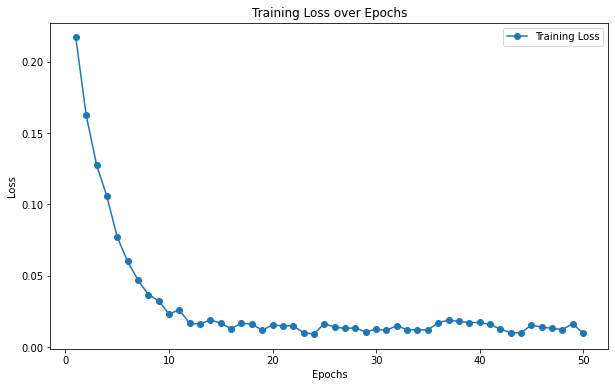

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, label='Training Loss', marker='o', linestyle='-')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.show()

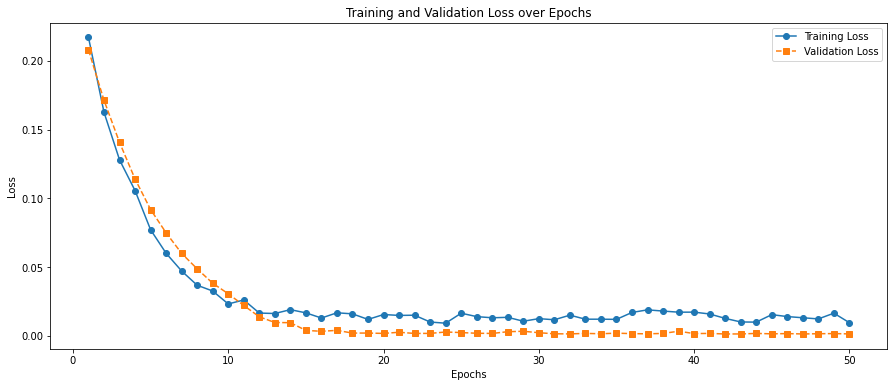

In [14]:
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
epochs = range(1, len(training_loss) + 1)

plt.figure(figsize=(15,6))
plt.plot(epochs, training_loss, label='Training Loss', marker='o', linestyle='-')
plt.plot(epochs, validation_loss, label='Validation Loss', marker='s', linestyle='--')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.show()

In [8]:
from tensorflow.keras.models import load_model
model1 = load_model('Indian_model/')

In [9]:
test_predictions = model1.predict(X_test)

2/2 [==============================] - 0s 0s/step


In [10]:
mse = mean_squared_error(y_test, test_predictions)
print('RMSE :', np.sqrt(mse))

mae = mean_absolute_error(y_test, test_predictions)
print('MAE :', mae)

RMSE : 0.041735682466721144
MAE : 0.03176918504088338


In [11]:
test_predictions = scaler.inverse_transform(test_predictions)
test_original = scaler.inverse_transform(y_test.reshape(-1,1))

In [12]:
train_results = pd.DataFrame(data={'Train Predictions': test_predictions.flatten(), 'Actual Extent': test_original.flatten()})
train_results

,Train Predictions,Actual Extent
0,1.195774e+06,1136509.923
1,1.885656e+06,1560879.775
2,2.363782e+06,2347500.604
3,2.964384e+06,3151724.833
4,3.599263e+06,3719188.531
5,3.804733e+06,3636501.241
6,2.910067e+06,2526913.818
7,9.528041e+05,1128752.378
8,4.891770e+05,522831.371
9,1.828483e+05,346601.304


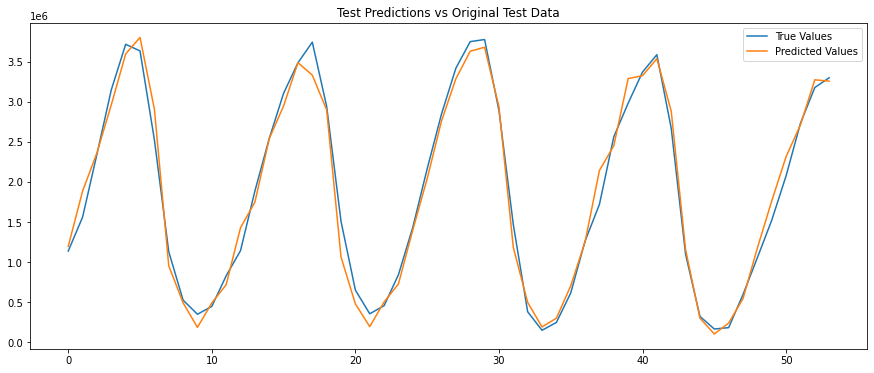

In [13]:
plt.figure(figsize=(15,6))
plt.plot(test_original, label='True Values')
plt.plot(test_predictions, label='Predicted Values')
plt.title('Test Predictions vs Original Test Data')
plt.legend()
plt.show()

In [14]:
predictions = model1.predict(X)

17/17 [==============================] - 0s 4ms/step


In [17]:
predictions = scaler.inverse_transform(predictions)
Original = scaler.inverse_transform(y.reshape(-1,1))

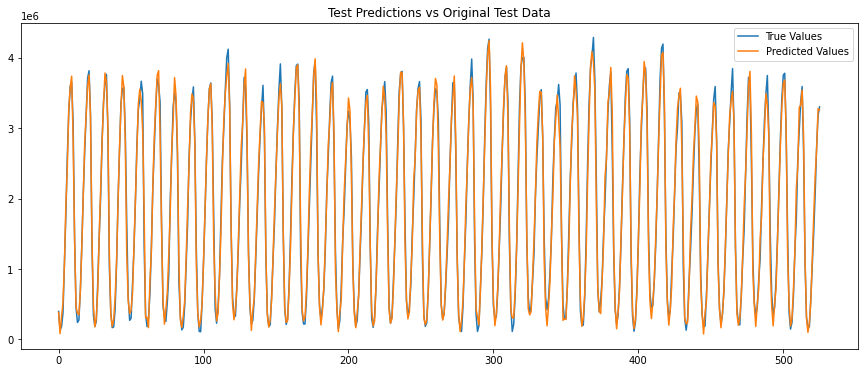

In [18]:
plt.figure(figsize=(15,6))
plt.plot(Original, label='True Values')
plt.plot(predictions, label='Predicted Values')
plt.title('Test Predictions vs Original Test Data')
plt.legend()
plt.show()